--- LEYENDO DATOS DE fractal_data.csv ---
Raíces detectadas: 16


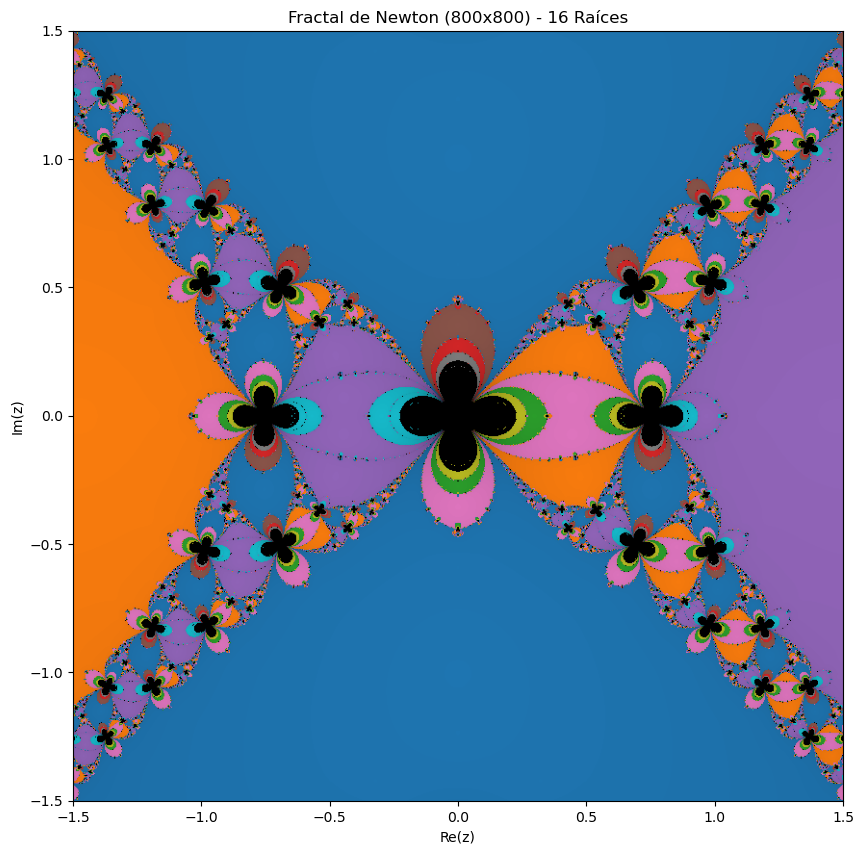

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

NOMBRE_ARCHIVO = "fractal_data.csv"

def main():
    print(f"LEYENDO DATOS DE {NOMBRE_ARCHIVO}")
    
    try:
        datos = pd.read_csv(NOMBRE_ARCHIVO)
    except FileNotFoundError:
        print("Error: No se encontró 'fractal_data.csv'.")
        print("Asegúrate de ejecutar primero tu programa en C.")
        return

    num_pixeles = len(datos) 
    resolucion = int(math.sqrt(num_pixeles)) 

    # Convertir los datos en matrices 2D, asegurando que sean enteros para la indexación
    raices = datos['root_idx'].values.astype(int).reshape((resolucion, resolucion))
    iters = datos['iteraciones'].values.reshape((resolucion, resolucion))
    
    # Contar número de raíces distintas
    max_raiz_idx = int(np.nanmax(raices))
    
    if max_raiz_idx < 0:
        print("Advertencia: No se encontraron píxeles convergentes.")
        num_raices = 0
    else:
        num_raices = max_raiz_idx + 1 # Si el índice máximo es 4, hay 5 raíces (0,1,2,3,4)
    
    print(f"Raíces detectadas: {num_raices}")

    # Generar paleta de colores dinámica
    if num_raices > 0:
        cmap = plt.get_cmap('tab10', num_raices)
        colores = cmap(np.arange(num_raices))[:, :3]
    else:
        colores = np.zeros((0, 3))

    # Crear imagen RGB vacía
    img = np.zeros((resolucion, resolucion, 3), dtype=float)

    mask_ok = raices >= 0  # Píxeles que sí convergieron
    
    # Asignar colores
    if num_raices > 0:
        img[mask_ok] = colores[raices[mask_ok]] 

    # Normalizamos las iteraciones de 0 a 1 para ajustar el brillo
    max_iter = iters.max() if iters.max() > 0 else 1
    
    brillo = 1.0 - (iters / max_iter) * 0.8
    brillo = np.clip(brillo, 0, 1)

    # Multiplicamos el color base por el brillo en los 3 canales
    for c in range(3):
        img[..., c] *= brillo

    plt.figure(figsize=(10, 10))
    plt.imshow(img, origin='lower', extent=[-1.5, 1.5, -1.5, 1.5])
    
    plt.title(f"Fractal de Newton ({resolucion}x{resolucion}) - {num_raices} Raíces")
    plt.xlabel("Re(z)")
    plt.ylabel("Im(z)")
    
    plt.show()

if __name__ == "__main__":
    main()